# PROBLEM STATEMENT

 This Dataset includes student Mental health issues, especially depression, are increasingly prevalent among students due to various factors such as academic pressure, financial stress, sleep patterns, and personal background. Early identification of depression risks can lead to better support systems and interventions.

Objective: The goal is to build a predictive model that can classify whether a student is likely to experience depression based on various features like academic pressure, CGPA, study habits, sleep duration, financial stress, suicidal thoughts, and more.

# Data Loading

In [3]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import scipy.stats as stats

# Mounting **Data**

In [4]:
#
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading CSV File**

In [5]:
df=pd.read_csv('/content/drive/MyDrive/ds/data/student_depression_dataset.csv')

# **ABOUT DATA SET**

The dataset is about student depression dataset typically contains data aimed at analysing, understanding, and predicting depression levels among students.

It may include 15 features such as demographic information age, gender, academic performance grades, attendance, lifestyle habits sleep patterns, exercise, social activities, mental health history, and responses to standardized depression scales and also contains 25512 rows.

These datasets are valuable for research in psychology, data science, and education to identify factors contributing to student depression and to design early involvement strategies. Ethical considerations like privacy, informed consent, and anonymization of data are crucial in working with such sensitive information

1.Age:Classifying Student into Age to understand the levels of student depression.2.Gender:Identifying which gender has most depression,Male or Female.3.City:Classifying Student Depression in different types of cities.4.Academic Pressure:Categorizing different levels of Academic Pressure.5.CGPA:Classifying how different CGPA's percentage effecting the Student Depression.6.Study Satisfaction:Understanding Student Depression based on study satisfaction.7.Sleep Duration:Understanding Student Depression based on number of hours of sleep.8.Dietary Habits:Understanding Student Depression based on Dietary Habits.9.Have You Ever Had Suicidal Thoughts?:Classifying Suicidal thoughts based on Student Depression.10.Study Hours:Categorizing Study Hours Of Students.11.Financial Stress:Classifying financial stress based on Student Depression.12.Depression:Analyzing Student Depression based on all above factors.

In [6]:
df



,ID,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,8.97,2.0,6.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24,Bangalore,Student,2,5.90,5.0,6.0,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,7.03,5.0,5.0,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28,Kanpur,Student,3,5.59,2.0,7.0,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,8.13,3.0,6.0,Moderate,MBA,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25506,128622,Male,28,Vadodara,Student,4,6.37,2.0,7.0,Moderate,B.Arch,Yes,2.0,5.0,No,1
25507,128628,Female,24,Surat,Student,2,7.25,4.0,5.0,Moderate,MBBS,Yes,10.0,5.0,Yes,1
25508,128629,Male,24,Jaipur,Student,1,9.04,2.0,8.0,Unhealthy,BSc,No,12.0,5.0,Yes,1
25509,128631,Male,21,Jaipur,Student,1,7.77,3.0,5.0,Unhealthy,BSc,Yes,5.0,1.0,Yes,1


In [ ]:
# head() returns the default  top 5 rows
df.head()

,ID,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,8.97,2.0,6.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24,Bangalore,Student,2,5.90,5.0,6.0,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,7.03,5.0,5.0,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28,Kanpur,Student,3,5.59,2.0,7.0,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,8.13,3.0,6.0,Moderate,MBA,Yes,1.0,1.0,No,0


In [ ]:
# tail() returns the default bottom  5 rows
df.tail()

,ID,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of mental Illness,Depression
25506,128622,Male,28,Vadodara,Student,4,6.37,2.0,7.0,Moderate,B.Arch,Yes,2.0,5.0,No,1
25507,128628,Female,24,Surat,Student,2,7.25,4.0,5.0,Moderate,MBBS,Yes,10.0,5.0,Yes,1
25508,128629,Male,24,Jaipur,Student,1,9.04,2.0,8.0,Unhealthy,BSc,No,12.0,5.0,Yes,1
25509,128631,Male,21,Jaipur,Student,1,7.77,3.0,5.0,Unhealthy,BSc,Yes,5.0,1.0,Yes,1
25510,128640,Female,30,Indore,Student,5,9.12,4.0,NaN,Healthy,BSc,Yes,0.0,1.0,Yes,0


In [ ]:
#info returns overall information about the data set count, dtype, memory usage,shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25511 entries, 0 to 25510
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     25511 non-null  int64  
 1   Gender                                 25511 non-null  object 
 2   Age                                    25511 non-null  int64  
 3   City                                   25511 non-null  object 
 4   Profession                             25511 non-null  object 
 5   Academic Pressure                      25511 non-null  int64  
 6   CGPA                                   24709 non-null  float64
 7   Study Satisfaction                     24793 non-null  float64
 8   Sleep Duration                         24777 non-null  float64
 9   Dietary Habits                         24761 non-null  object 
 10  Degree                                 25511 non-null  object 
 11  Ha

The dataset contains of 25511 entries and 15 columns.It includes a mix of data types:4 integer columns(ID,Age,Academic Pressure,Depression),7 object types(Gender,City,Profession,Dietary Habits,Degree, Have you ever had suicidal thoughts ?, Family History of mental Illness ) and 5 float columns(CGPA,Study Satisfaction,Sleep Duration,Financial Stress,Study Hours)

In [ ]:
#isnull().sum() it gives the count of the nullvalues for each columns
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
CGPA,802
Study Satisfaction,718
Sleep Duration,734
Dietary Habits,750


In [ ]:
# df.select_dtypes("object").columns it returns the categorical(object type columns) columns
cat_column=df.select_dtypes("object").columns
cat_column

Index(['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of mental Illness'],
      dtype='object')

In [ ]:
#df.select_dtypes(["int","float"]).columns ,it returns numerical(int,float) columns

num_column=df.select_dtypes(["int","float"]).columns
num_column

Index(['ID', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Study Hours', 'Financial Stress', 'Depression'],
      dtype='object')

In [ ]:
#numeric column null value will fill by mean
#CGPA,Study Satisfaction,Sleep Duration,'Study Hours''Financial Stress'

# Fill missing values with mean for specific numeric columns
columns_to_fill = ['CGPA', 'Study Satisfaction', 'Sleep Duration', 'Study Hours', 'Financial Stress']

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
#categorical column null value will fill with mode
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])

In [ ]:
df.isnull().sum()#It returns number of null values in each column

,0
ID,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0


In [ ]:
df.describe()#The describe() method returns description of the data in the DataFrame.If the DataFrame contains numerical data, the description contains these information for each column.

,ID,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Study Hours,Financial Stress,Depression
count,25511.000000,25511.000000,25511.000000,25511.000000,25511.000000,25511.000000,25511.000000,25511.000000,25511.000000
mean,64429.087178,25.819254,3.142880,7.659600,2.945347,6.400856,7.146381,3.138806,0.585355
std,37189.401135,4.901586,1.381887,1.447244,1.343231,1.111938,3.652250,1.419489,0.492670
min,2.000000,18.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000
25%,31951.500000,21.000000,2.000000,6.370000,2.000000,5.000000,4.000000,2.000000,0.000000
50%,64520.000000,25.000000,3.000000,7.700000,3.000000,6.000000,8.000000,3.000000,1.000000
75%,96913.000000,30.000000,4.000000,8.910000,4.000000,7.000000,10.000000,4.000000,1.000000
max,128640.000000,59.000000,5.000000,10.000000,5.000000,8.000000,12.000000,5.000000,1.000000


In [ ]:
df.duplicated().sum()#It returns number of duplicate columns

np.int64(0)

In [ ]:
df.shape#It returns number of rows and columns of data set

(25511, 16)

# **UNIVARIATE ANALYSIS**
Univariate analysis in data science is the process of examining a single variable at a time within a dataset.

<ipython-input-18-f996c4bfc422>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


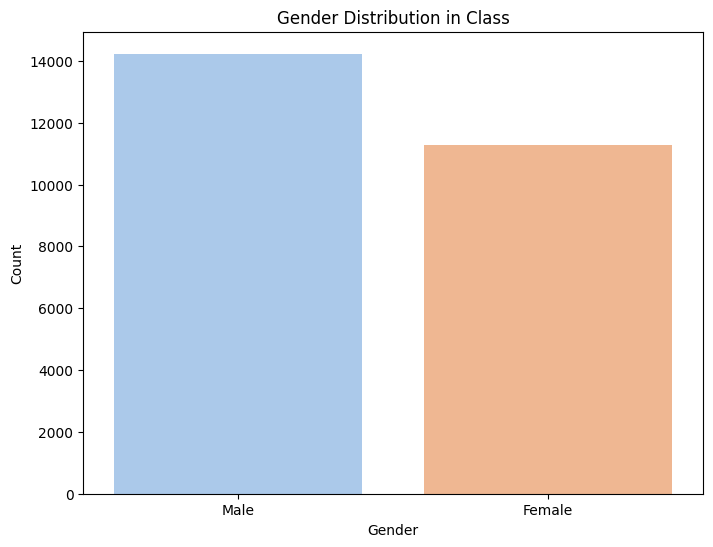

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution in Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The count plot visually represents the distribution of genders,which are male and female.Here, male bar is longer than the female bar.This indicates gender with male students suffers depression more than female students

<ipython-input-19-e09e33db11e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Academic Pressure', data=df, palette='pastel')


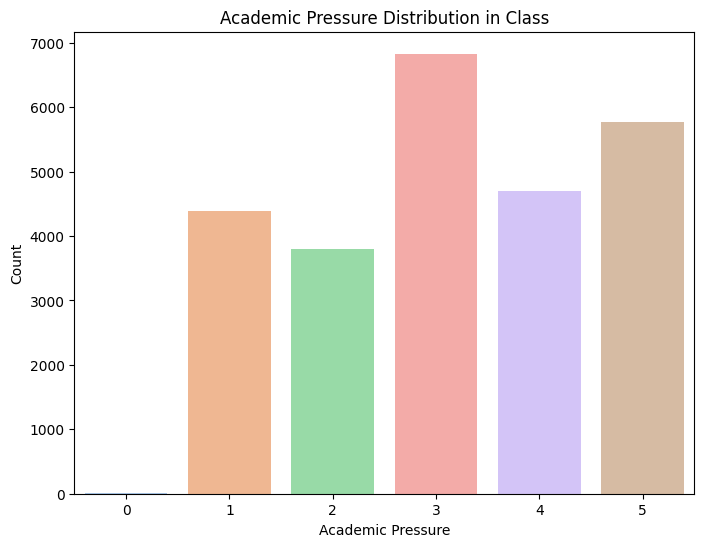

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Academic Pressure', data=df, palette='pastel')
plt.title('Academic Pressure Distribution in Class')
plt.xlabel('Academic Pressure')
plt.ylabel('Count')
plt.show()

The count plot visually represents the distribution of Academic Pressure.The range of Academic Pressure is between 0-5.In X-axis we have Academic Pressure,Y-axis represents the count.Where the academic pressure rated by the students  is in 3 in majority and the least Academic Pressure is rated as 2.

<ipython-input-20-2a32e919dbc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Study Satisfaction',data=df, palette='pastel')


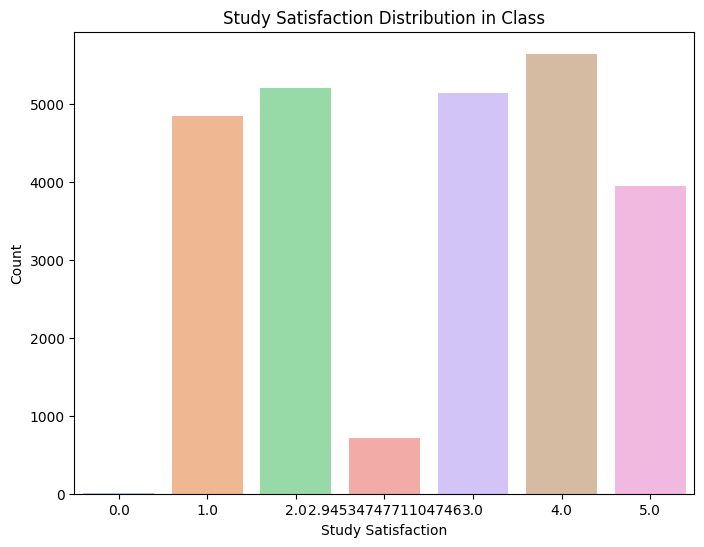

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Study Satisfaction',data=df, palette='pastel')
plt.title('Study Satisfaction Distribution in Class')
plt.xlabel('Study Satisfaction')
plt.ylabel('Count')
plt.show()

From the above count plot,X-axis contains Study Satisfaction and Y-axis contains count.The scale is between 0 to 5.The least Study Satisfaction rated lies between 2 and 3.The maximum Study Satisfaction is rated as 4.

<ipython-input-21-3255213566ff>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='CGPA', data=df, palette='pastel')


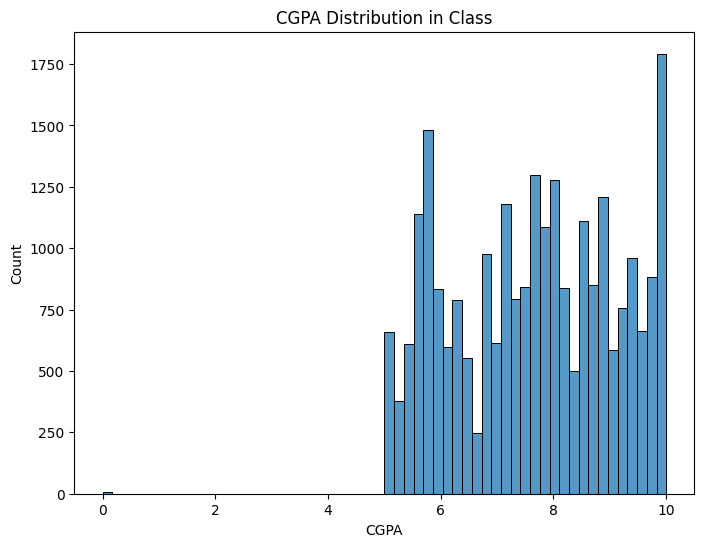

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(x='CGPA', data=df, palette='pastel')
plt.title('CGPA Distribution in Class')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

Here are four simple observations based on the CGPA distribution graph:

1. Most students have a CGPA between 5 and 10.  
2. The highest number of students have a CGPA close to 10.  
3. Very few students have a CGPA below 5.  
4. The distribution is slightly right-skewed, with a concentration toward higher CGPAs.

<ipython-input-22-f6dfdd5e81f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep Duration', data=df, palette='pastel')


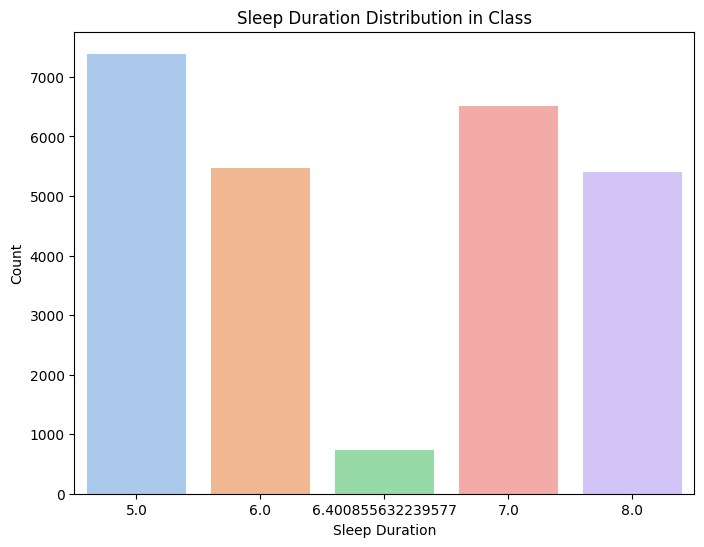

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Duration', data=df, palette='pastel')
plt.title('Sleep Duration Distribution in Class')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.show()

The count plot distributes sleep hours between 5 to 8 hours.In X-axis we have Sleep Duration and Y-axis we have count.The most of the students sleep upto 5 hours and least number of students sleep between 6 to 7 hours.

<ipython-input-23-d60a0283c382>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(y='Degree', data=df, palette='pastel')


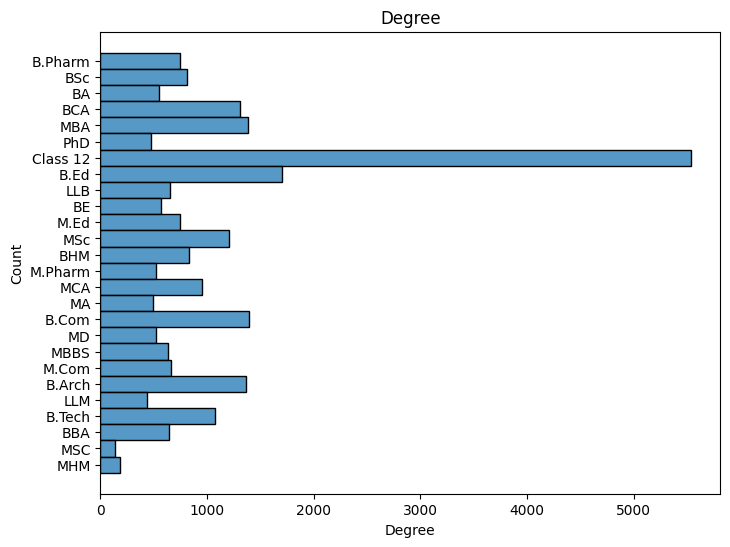

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y='Degree', data=df, palette='pastel')
plt.title('Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

The histogram distributes students different types of graduation and post graduation courses on Y-axis and in X-axis we have count.The most of the students studied in 12th class.Where as least number of students study in MSC and MHM.

<ipython-input-24-a192de31d938>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Financial Stress', data=df, palette='pastel')


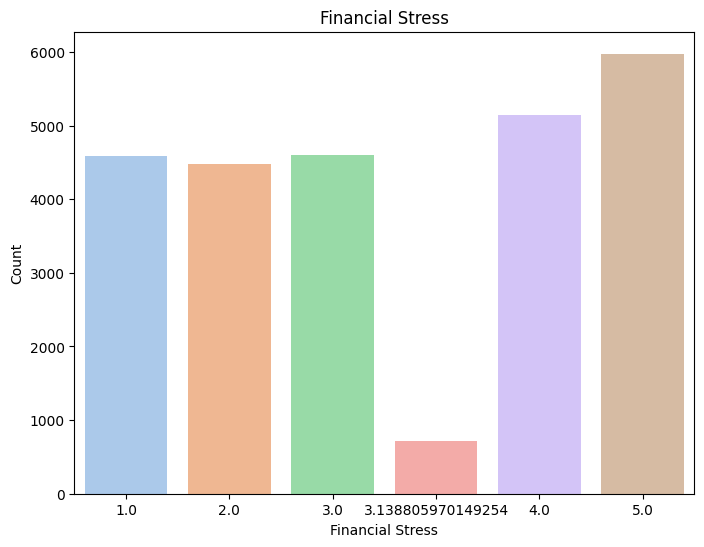

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Financial Stress', data=df, palette='pastel')
plt.title('Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Count')
plt.show()

The count plot distributes Financial Stress scale between 1 to 5.In X-axis it represents financial stress and Y-axis represents count.The most financial stress is rated on 4 and 5 . The least financial stress is between 3 and 4.

<ipython-input-25-50d607bb8866>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Have you ever had suicidal thoughts ?', data=df, palette='pastel')


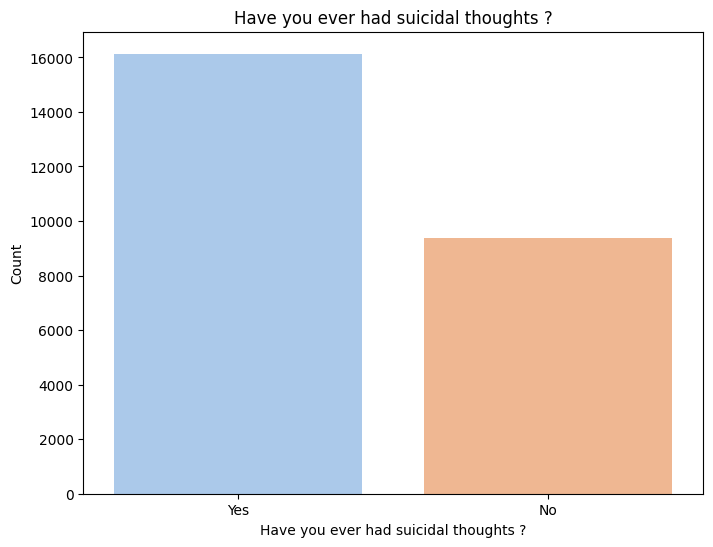

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Have you ever had suicidal thoughts ?', data=df, palette='pastel')
plt.title('Have you ever had suicidal thoughts ?')
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.ylabel('Count')
plt.show()

The count plot distributes have you ever had a suicidal thoughts with Yes and No . In X-axis it represents the Yes and No and Y-axis represents count.Most of the students has the thoughts Yes

<ipython-input-26-1092209081b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Have you ever had suicidal thoughts ?', data=df, palette='pastel')


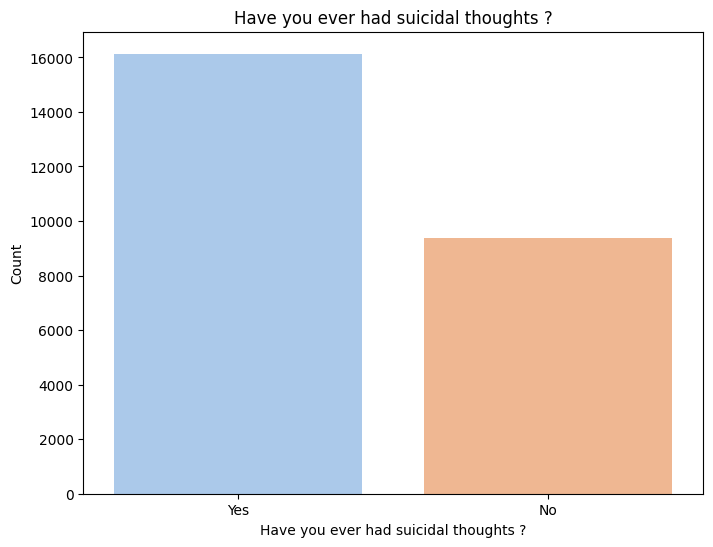

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Have you ever had suicidal thoughts ?', data=df, palette='pastel')
plt.title('Have you ever had suicidal thoughts ?')
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.ylabel('Count')
plt.show()

<ipython-input-27-1aa9fd91a8e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family History of mental Illness', data=df, palette='pastel')


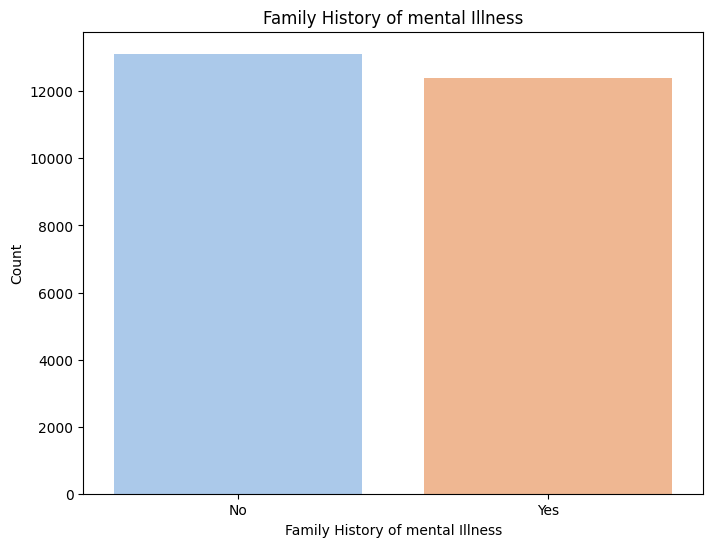

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Family History of mental Illness', data=df, palette='pastel')
plt.title('Family History of mental Illness')
plt.xlabel('Family History of mental Illness')
plt.ylabel('Count')
plt.show()

The count plot distributes Family History of mental Illness With Yes and NO In X-axis it represents the Yes and No and  in Y-axis represents count.Most of the students has not have the  Family History of mental illness



<ipython-input-28-3d7172e7778f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df, palette='pastel')


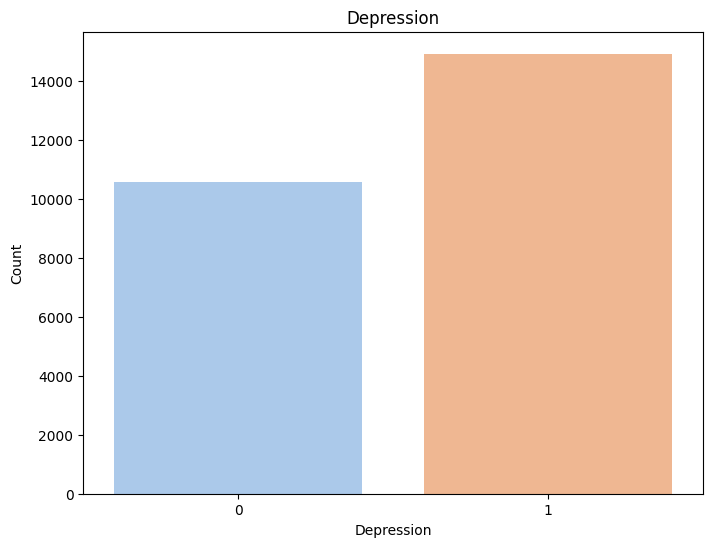

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', data=df, palette='pastel')
plt.title('Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

The count plot distributes Depression With Yes and NO In X-axis it represents the 0 as No  and 1 a Yes  and in Y-axis represents count.Most of the data in 1 That mean Yes

# **Bivariate Analysis**
Bivariate analysis in data science is the examination of the relationship between two variables.

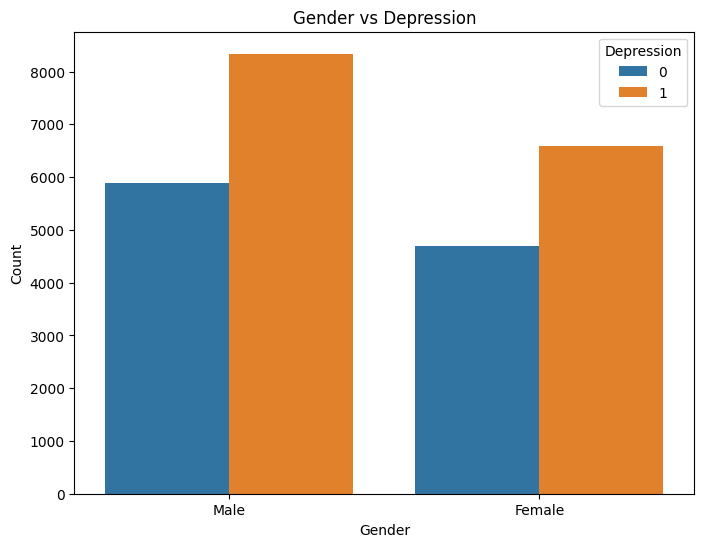

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender',hue='Depression', data=df)
plt.title('Gender vs Depression')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Both males and females show higher counts of depression compared to no depression.More males are affected by depression than females in this dataset.Among females, depression cases are also noticeably higher than non-depression cases.Depression appears to be more common across both genders, especially in males.









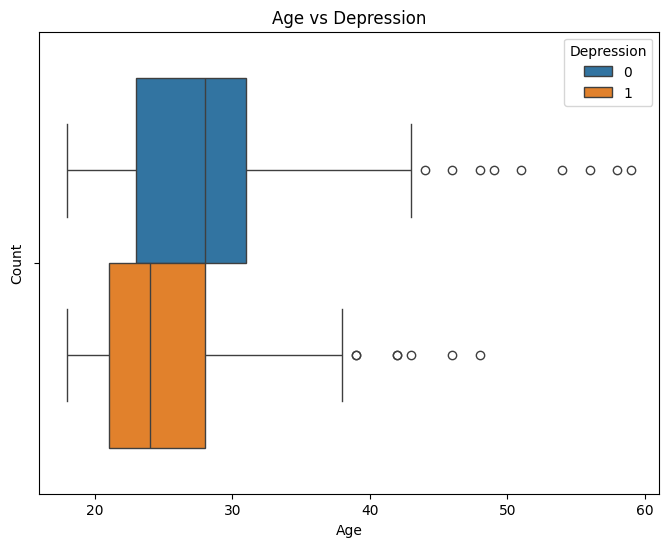

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age',hue='Depression', data=df)
plt.title('Age vs Depression')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most people, both with and without depression, are in their 20s and early 30s.The age range for people with depression is slightly lower than for those without.There are more outliers (older individuals) in the group without depression.Depression is more concentrated among younger adults.

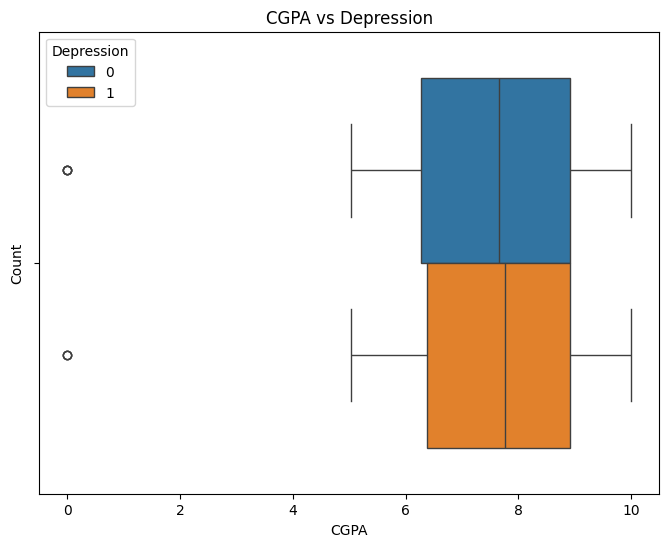

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CGPA',hue='Depression', data=df)
plt.title('CGPA vs Depression')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

Students with and without depression mostly have CGPA'S have 6 and 9.5.The median CGPA for non-depressed students is slightly higher than for depressed students.Depressed students have a slightly wider spread in CGPA.There is one outlier with a very low CGPA amoung non-depressed students.

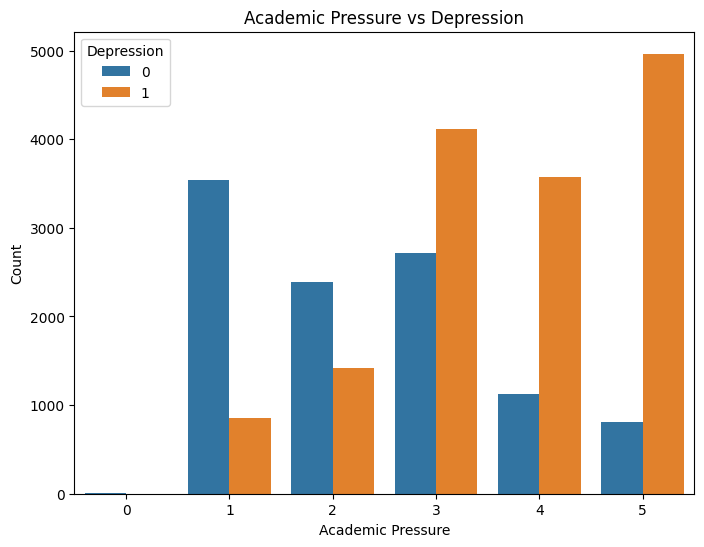

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Academic Pressure',hue='Depression', data=df)
plt.title('Academic Pressure vs Depression')
plt.xlabel('Academic Pressure')
plt.ylabel('Count')
plt.show()

Students with low academic pressure (0-1) mostly do not have depression.As academic pressure increases,depression cases also increases.At highest pressure level(5),most students are depressed.There is a clear positive relationship between academic pressure and depression.

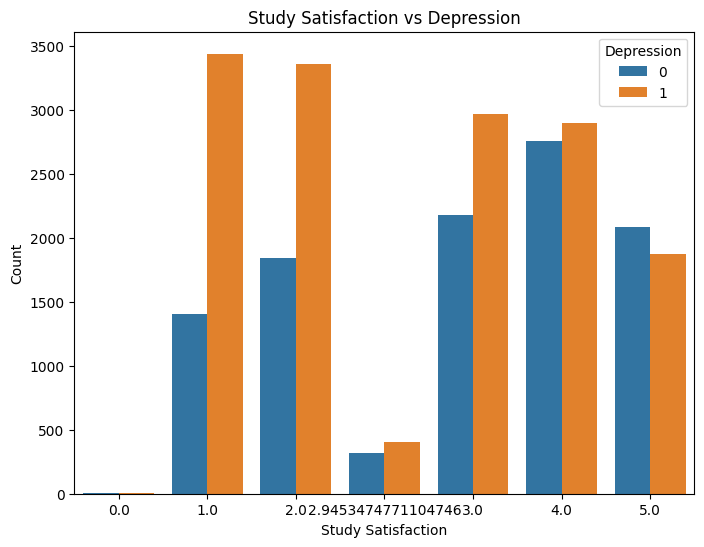

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Study Satisfaction',hue='Depression', data=df)
plt.title('Study Satisfaction vs Depression')
plt.xlabel('Study Satisfaction')
plt.ylabel('Count')
plt.show()

From the distribution of the countplot,it shows when the study satisfaction levels are high depression is low,when the study satisfaction is low depression is high.The longest bar of the depression is at 1 and 2,the shortest depression bar is at 5.Students with low study satisfaction (1 and 2) tend to have higher depression counts.

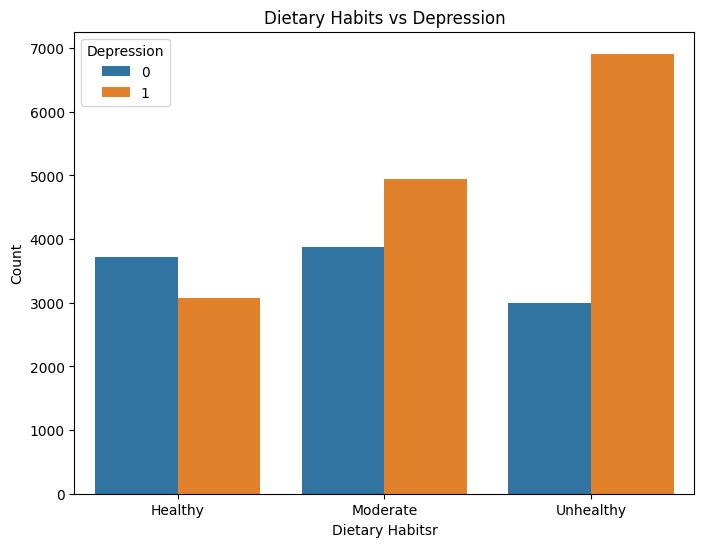

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dietary Habits',hue='Depression', data=df)
plt.title('Dietary Habits vs Depression')
plt.xlabel('Dietary Habitsr')
plt.ylabel('Count')
plt.show()

The distribution of the count plot of depression(0,1) and dietary habits are Healthy,Unhealthy,Moderate Dietary.The depression is high when student dietary habits are unhealthy and moderate,the depression is low when the student dietary habits are healthy.

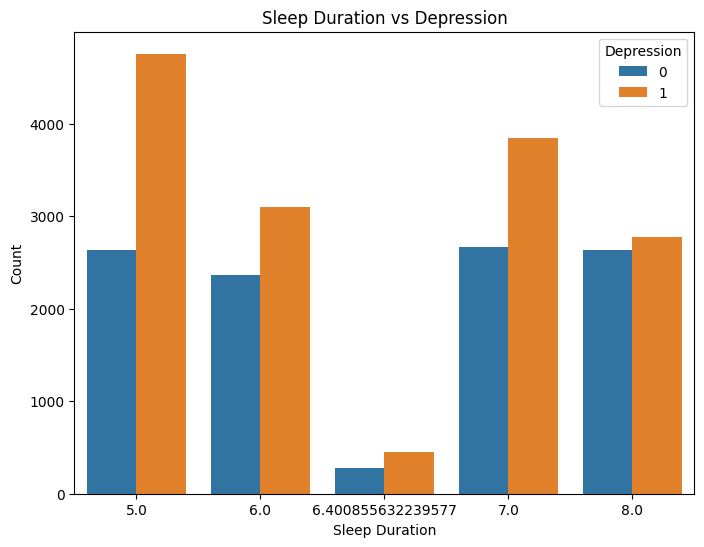

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Duration',hue='Depression', data=df)
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.show()

The count plot shows the distribution of depression(0,1) and sleep duration .It is seen that the depression is at highest peak when the hours of sleep duration are low,especially at the hours of 5.

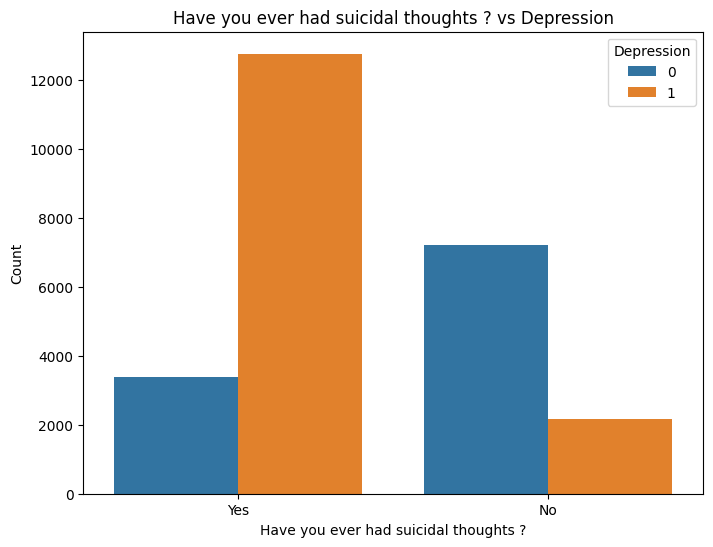

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Have you ever had suicidal thoughts ?',hue='Depression', data=df)
plt.title('Have you ever had suicidal thoughts ? vs Depression')
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.ylabel('Count')
plt.show()

The countplot shows the distribution depression and students having suicidal thoughts.It is significantly seen that the students having suicidal thoughts are having more depression and students having less suicidal thoughts have less depression.There is the risk of having more suicidal thoughts when the student suffers from depression.

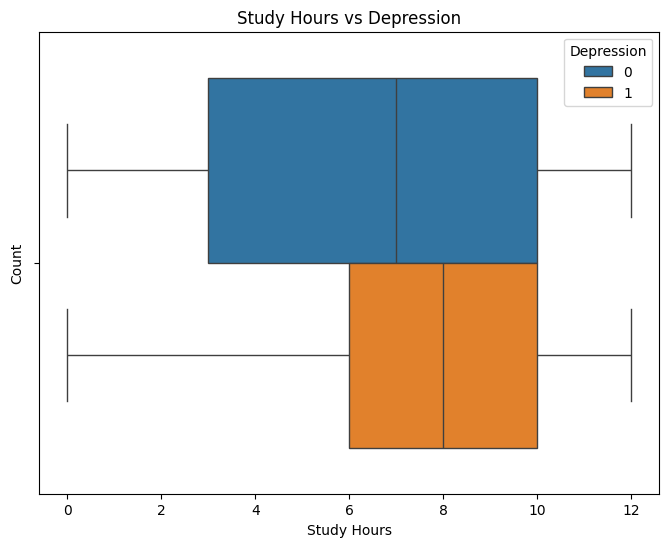

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Study Hours',hue='Depression', data=df)
plt.title('Study Hours vs Depression')
plt.xlabel('Study Hours')
plt.ylabel('Count')
plt.show()

The boxplot compares study hours between students with and without depression.Students without depression (0) have a wider range of study hours.Students with depression (1) tend to study more, with a higher median.
There is some overlap, but extreme study hours are seen in both groups.

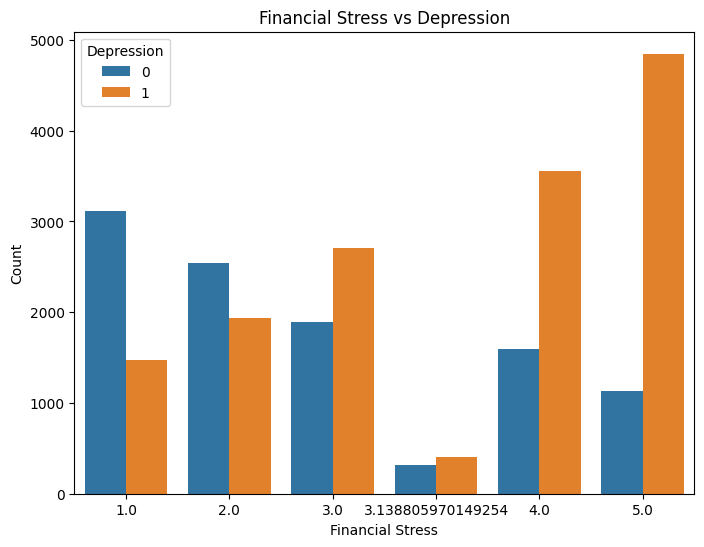

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Financial Stress',hue='Depression', data=df)
plt.title('Financial Stress vs Depression')
plt.xlabel('Financial Stress')
plt.ylabel('Count')
plt.show()

The above countplot compares financial stress with and without depression.As financial stress increases, the number of people with depression also increases.People with low financial stress (level 1 or 2) are more likely not to have depression.At higher financial stress levels (4 and 5), depression cases are significantly higher.There is a clear positive relationship between financial stress and depression.

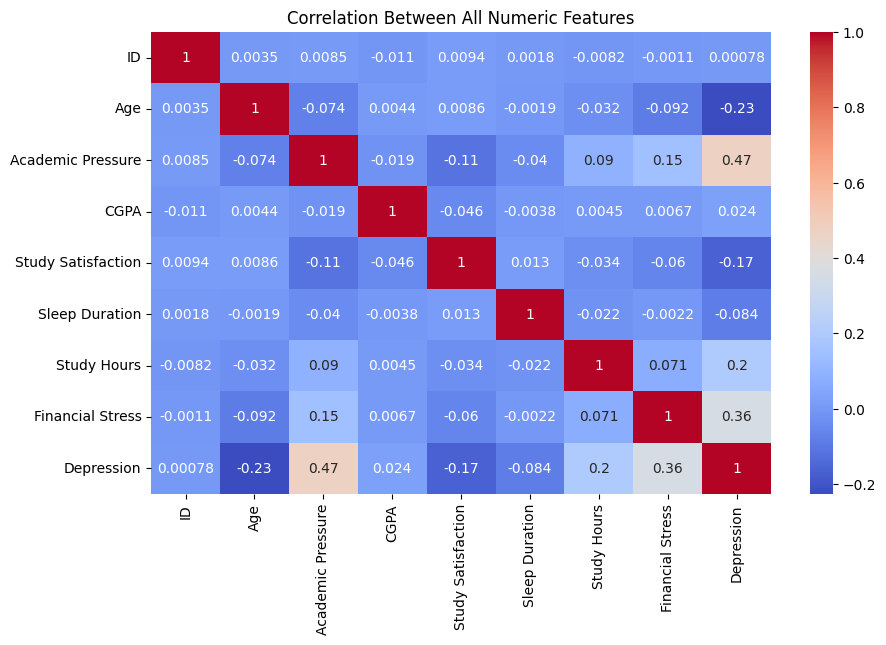

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_column].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between All Numeric Features")
plt.show()

Academic Pressure has the highest positive correlation with Depression (0.47), meaning more pressure is linked to higher depression.

Financial Stress is also positively correlated with Depression (0.36), indicating financial difficulties may contribute to mental health issues.

Study Satisfaction has a negative correlation (-0.17) with Depression, showing that happier students are less likely to be depressed.

Age shows a slight negative correlation (-0.23) with Depression, suggesting younger individuals may be more prone to depression.

Most other variables like CGPA, Sleep Duration, and Study Hours show weak or minimal correlations with Depression.

In [ ]:
# Identify numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col}: {outliers.shape[0]} outliers")

ID: 0 outliers
Age: 11 outliers
Academic Pressure: 0 outliers
CGPA: 7 outliers
Study Satisfaction: 0 outliers
Sleep Duration: 0 outliers
Study Hours: 0 outliers
Financial Stress: 0 outliers
Depression: 0 outliers


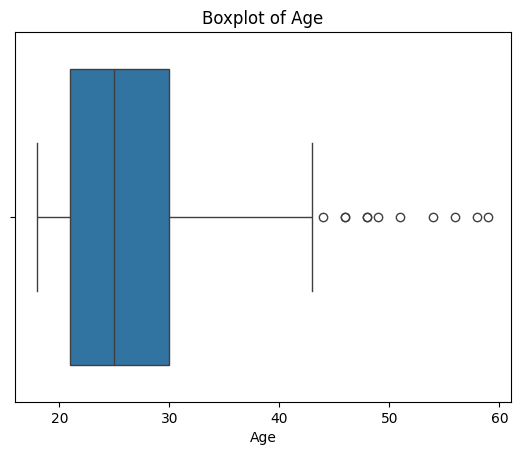

In [ ]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

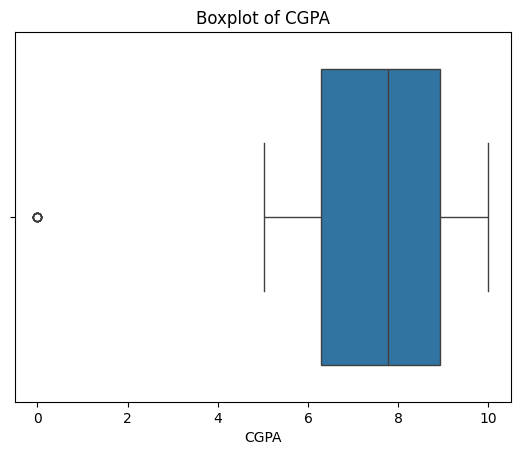

In [ ]:
sns.boxplot(x=df['CGPA'])
plt.title("Boxplot of CGPA")
plt.show()

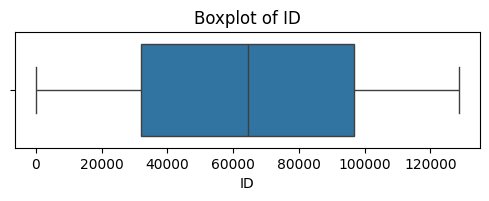

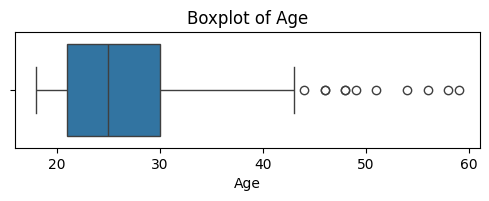

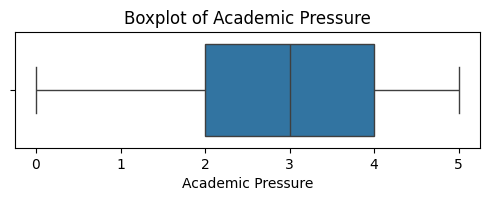

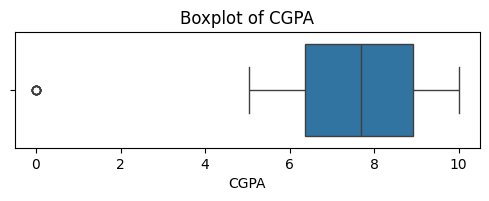

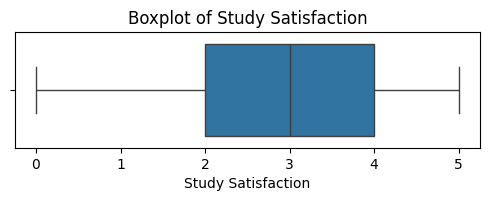

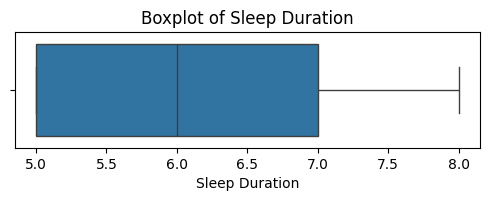

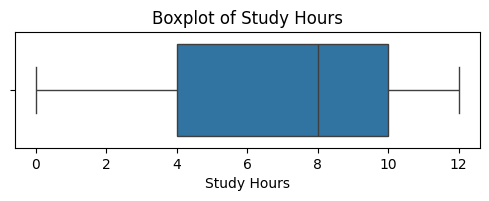

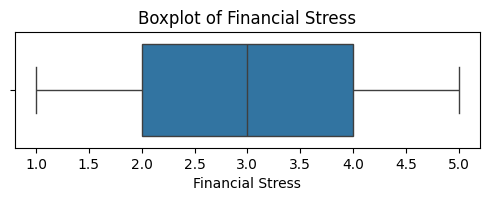

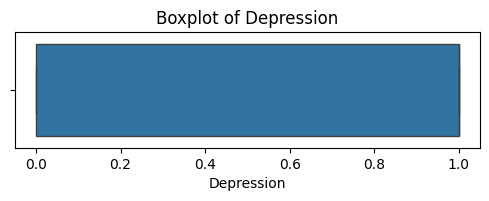

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

These are all the box plots of different columns used for identifying outliers.The identified outliers are Age,CGPA.

In [ ]:
# List of columns you want to check for outliers
columns = ['Age', 'CGPA']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

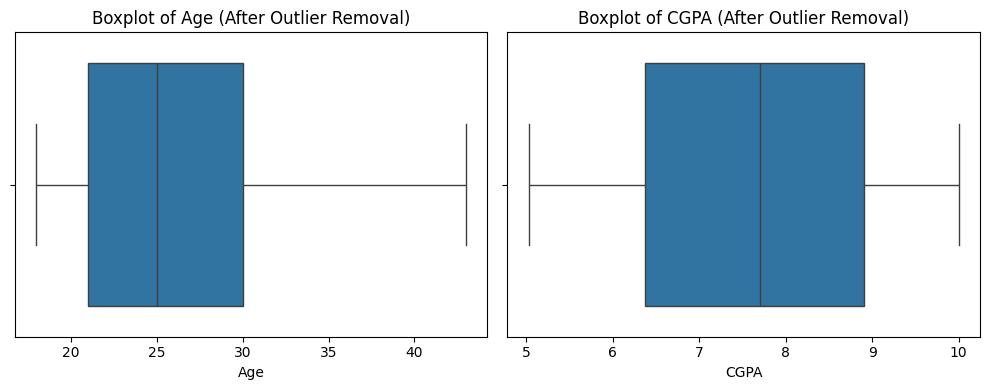

In [ ]:
plt.figure(figsize=(10, 4))
# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (After Outlier Removal)")

# Boxplot for CGPA
plt.subplot(1, 2, 2)
sns.boxplot(x=df['CGPA'])
plt.title("Boxplot of CGPA (After Outlier Removal)")

plt.tight_layout()
plt.show()

This boxplot represents the removal of outliers after identifying them.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['Gender', 'City', 'Profession', 'Dietary Habits',
                    'Degree', 'Have you ever had suicidal thoughts ?',
                    'Family History of mental Illness']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head(2)

,ID,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of mental Illness,Depression
0,2,1,33,26,0,5,8.97,2.0,6.0,0,3,1,3.0,1.0,0,1
1,8,0,24,2,0,2,5.90,5.0,6.0,1,10,0,3.0,2.0,1,0


In [ ]:
df.dtypes

,0
ID,int64
Gender,int64
Age,int64
City,int64
Profession,int64
Academic Pressure,int64
CGPA,float64
Study Satisfaction,float64
Sleep Duration,float64
Dietary Habits,int64


In [ ]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
City: [26  2 21 11 10 19 23  4 16 17 24 27 20  1 13 15  9 22 14  3  0  7  8 25
 18  6  5 12]
Profession: [0]
Dietary Habits: [0 1 2]
Degree: [ 3 10  5  7 18 25 11  2 12  8 15 24  9 16 20 17  1 21 19 14  0 13  4  6
 23 22]
Have you ever had suicidal thoughts ?: [1 0]
Family History of mental Illness: [0 1]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
            'Sleep Duration', 'Study Hours', 'Financial Stress']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head()

,ID,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of mental Illness,Depression
0,2,1,1.475862,26,0,1.343851,0.907248,-0.704471,-0.360722,0,3,1,-1.135615,-1.506438,0,1
1,8,0,-0.371034,2,0,-0.827863,-1.221839,1.529917,-0.360722,1,10,0,-1.135615,-0.802005,1,0
2,26,1,1.065441,21,0,-0.103959,-0.438168,1.529917,-1.260054,0,5,0,0.507366,-1.506438,1,0
3,30,0,0.449809,11,0,-0.103959,-1.436828,-0.704471,0.538610,1,7,1,-0.861785,1.311294,1,1
4,32,0,-0.165824,10,0,0.619946,0.324697,0.040325,-0.360722,1,18,1,-1.683276,-1.506438,0,0


In [ ]:
df[num_cols].describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Study Hours,Financial Stress
count,2.549300e+04,2.549300e+04,2.549300e+04,2.549300e+04,2.549300e+04,2.549300e+04,2.549300e+04
mean,-2.160086e-17,-2.787207e-18,-2.077863e-16,7.358227e-17,-4.805145e-16,-1.611006e-16,-8.556726e-17
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.602299e+00,-2.275672e+00,-1.825196e+00,-2.194064e+00,-1.260054e+00,-1.957106e+00,-1.506438e+00
25%,-9.866665e-01,-8.278631e-01,-8.958876e-01,-7.044714e-01,-1.260054e+00,-8.617852e-01,-8.020051e-01
50%,-1.658236e-01,-1.039585e-01,2.648586e-02,4.032471e-02,-3.607216e-01,2.335358e-01,-9.757221e-02
75%,8.602301e-01,6.199461e-01,8.656377e-01,7.851208e-01,5.386105e-01,7.811963e-01,6.068607e-01
max,3.527970e+00,1.343851e+00,1.621568e+00,1.529917e+00,1.437942e+00,1.328857e+00,1.311294e+00


# **MODEL BUILDING**

In [ ]:
X = df.drop(['Depression', 'ID'], axis=1)#Split Features and Target
y = df['Depression']

In [ ]:
#Train-Test Split the data will defided into 4 part X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20394, 14)
X_test shape: (5099, 14)
y_train shape: (20394,)
y_test shape: (5099,)


In [ ]:
X_train.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of mental Illness
2310,0,1.475862,19,0,-0.103959,-0.576871,-1.449268,-1.260054,1,2,1,-0.587955,-0.097572,1
24380,0,0.655019,25,0,-0.827863,-1.131682,-0.704471,1.437942,1,6,0,0.507366,-0.802005,0
2403,1,1.681073,11,0,-1.551768,1.364968,0.040325,-1.260054,1,0,0,-0.861785,-1.506438,1
19821,0,-1.397088,14,0,-0.827863,1.073692,-0.704471,-0.360722,0,11,1,1.328857,0.606861,1
878,0,0.655019,24,0,-0.103959,0.151318,-1.449268,-1.260054,1,4,1,0.781196,1.311294,1


In [ ]:
X_train.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of mental Illness
2310,0,1.475862,19,0,-0.103959,-0.576871,-1.449268,-1.260054,1,2,1,-0.587955,-0.097572,1
24380,0,0.655019,25,0,-0.827863,-1.131682,-0.704471,1.437942,1,6,0,0.507366,-0.802005,0
2403,1,1.681073,11,0,-1.551768,1.364968,0.040325,-1.260054,1,0,0,-0.861785,-1.506438,1
19821,0,-1.397088,14,0,-0.827863,1.073692,-0.704471,-0.360722,0,11,1,1.328857,0.606861,1
878,0,0.655019,24,0,-0.103959,0.151318,-1.449268,-1.260054,1,4,1,0.781196,1.311294,1


# Logistic Regression
Logistic regression is a statistical method used in data science for predicting a binary outcome (e.g., yes/no, 0/1) based on one or more predictor variables.It's a classification algorithm.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")

Logistic Regression Accuracy: 0.84


# Random Forest
Random forest is a machine learning algorithm that creates an ensemble of multiple decision trees to reach a singular, more accurate prediction or result.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")

Random Forest Accuracy: 0.83


# **Support Vector Machine (SVM)**
A support vector machine (SVM) is a type of supervised learning algorithm used in machine learning to solve classification and regression tasks.

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.2f}")

SVM Accuracy: 0.84


#K-Nearest Neighbors (KNN)
kNN, or the k-nearest neighbor algorithm, is a machine learning algorithm that uses proximity to compare one data point with a set of data it was trained on and has memorized to make predictions.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.2f}")


KNN Accuracy: 0.77


# XGBoost
XGBoost (eXtreme Gradient Boosting) is a distributed, open-source machine learning library that uses gradient boosted decision trees, a supervised learning boosting algorithm that makes use of gradient descent.

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.2f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:25:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.82


# Logistic Regression – Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize and fit
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_log))

Logistic Regression Accuracy: 0.8366346342420082
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      2108
           1       0.85      0.88      0.86      2991

    accuracy                           0.84      5099
   macro avg       0.83      0.83      0.83      5099
weighted avg       0.84      0.84      0.84      5099

Confusion Matrix:
 [[1631  477]
 [ 356 2635]]
ROC AUC Score: 0.9101434601083453


The logistic regression model acheived an accuracy of approximately 83.66%.
Precision and recall for class 1 are higher than for class 0 ,suggesting the model performs slightly better in detecting class 1.The confusion matrix indicates more false positives (477) than false negavtives(356).The ROC AUC score is 0.91,showing strong overall model performance in distinguising between the two classes.

# Random Forest Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
+
# Initialize and fit
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

Random Forest Accuracy: 0.8325161796430672
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2108
           1       0.84      0.88      0.86      2991

    accuracy                           0.83      5099
   macro avg       0.83      0.82      0.83      5099
weighted avg       0.83      0.83      0.83      5099

Confusion Matrix:
 [[1626  482]
 [ 372 2619]]
ROC AUC Score: 0.9045526046831196


The Random Forest model acheived an accuracy of 83.25% and a strong ROC AUC score of 0.9045 indicating excellence performance.
Precision,recall,and F1-score fpr class 1 are higher ,suggesting the model performs better on the majority class.
The confusion matrix shows 26,191 true positives and 1626 true negatives ,with relatively fewer false predictions.
Overall,the model is well-balanced and effective ,especially in identifying positive class instances.

# #SVM Evaluation

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize and fit (with probability=True for ROC AUC)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_svm))

SVM Accuracy: 0.8360462835850166
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      2108
           1       0.84      0.89      0.86      2991

    accuracy                           0.84      5099
   macro avg       0.83      0.83      0.83      5099
weighted avg       0.84      0.84      0.84      5099

Confusion Matrix:
 [[1615  493]
 [ 343 2648]]
ROC AUC Score: 0.9089499681841223


The SVM model achieved an accuracy of 83.60% and an impressive ROC AUC score of 0.9080, indicating strong model performance.
It performed slightly better on class 1 with a high recall of 0.89 and F1-score of 0.86.
The confusion matrix shows balanced predictions with minimal false classifications.
Overall, SVM demonstrated reliable and consistent classification results.

# KNN Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize and fit
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_knn))

KNN Accuracy: 0.7725044126299274
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.64      0.70      2108
           1       0.77      0.86      0.82      2991

    accuracy                           0.77      5099
   macro avg       0.77      0.75      0.76      5099
weighted avg       0.77      0.77      0.77      5099

Confusion Matrix:
 [[1354  754]
 [ 406 2585]]
ROC AUC Score: 0.8285002858036474


The KNN model has an accuracy of 77.2%, which is relatively lower compared to the other classifiers.
Its ROC AUC of 0.8285 indicates moderate discriminative capability.
Precision, recall, and F1-scores are lower for class 1, leading to higher misclassifications.
Overall, KNN is the least effective model in this particular comparison.

# XGBoost Evaluation

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize and fit
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8238870366738577
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      2108
           1       0.84      0.86      0.85      2991

    accuracy                           0.82      5099
   macro avg       0.82      0.82      0.82      5099
weighted avg       0.82      0.82      0.82      5099

Confusion Matrix:
 [[1623  485]
 [ 413 2578]]
ROC AUC Score: 0.8978952194978358


The XGBoost model achieved an accuracy of 82.77% and an ROC AUC of 0.8979, indicating strong class-separation capability.
Precision, recall, and F1-score for class 1 are balanced, suggesting consistent predictive performance.
However, it still has slightly higher misclassifications compared to some of the top models in this comparison.
Overall, XGBoost is a reliable option but not the top performer among all tested models.

#Logistic Regression - Hyperparameter Tuning
In the context of Logistic Regression, hyperparameter tuning refers to the process of finding the best values for parameters that control the learning process itself, rather than parameters learned from the data during model training.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Type of penalty
    'solver': ['liblinear']        # Needed for L1 penalty
}

# Setup GridSearchCV
grid_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters (Logistic Regression):", grid_log.best_params_)
print("Best Score (Logistic Regression):", grid_log.best_score_)

Best Parameters (Logistic Regression): {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score (Logistic Regression): 0.8479943023279441


## **RANDOM FOREST-HYPERPARAMETER TUNING**
Hyperparameter tuning transforms Random Forests into powerful predictive models, but requires a strategic approach.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

random_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_rf,
                               n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", random_rf.best_params_)
print("Best Score (Random Forest):", random_rf.best_score_)

Best Parameters (Random Forest): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Best Score (Random Forest): 0.8442679219378247


# **KNN(K-Nearest Neighbours)**
K-Nearest Neighbor Classifier is a machine learning algorithm used for classification and regression. It works by finding the K nearest points in the training dataset and uses their class to predict the class or value of a new data point.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = KNeighborsClassifier()
random_knn = RandomizedSearchCV(knn_model, param_grid_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_knn.fit(X_train, y_train)

print("Best Parameters (KNN):", random_knn.best_params_)
print("Best Score (KNN):", random_knn.best_score_)

Best Parameters (KNN): {'weights': 'uniform', 'n_neighbors': 30, 'metric': 'manhattan'}
Best Score (KNN): 0.8224479477836034


# **Joblib**

`joblib` is a Python library used for saving and loading machine learning models or large data efficiently. It is especially useful for serializing objects with large numpy arrays faster than `pickle`.

In [ ]:
import joblib

# Save your train-test data
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(
    eval_metric='logloss',  # use_label_encoder is removed in xgboost>=2.0.0
    verbosity=0,            # optional: suppress output
    use_label_encoder=False  # still supported, but will be ignored in >=2.0
)

# Randomized Search CV
random_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_xgb.fit(X_train, y_train)

# Output the best parameters and score
print(" Best Parameters (XGBoost):", random_xgb.best_params_)
print(" Best Score (XGBoost):", random_xgb.best_score_)



 Best Parameters (XGBoost): {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
 Best Score (XGBoost): 0.8493672840266916


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined

# Initialize KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Update model dictionary
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'KNN': knn_model
}

# Re-evaluate all models (TRAIN before predicting)
accuracy_scores = {}

for name, model in models.items():
    # Train the model if it's not already trained
    if name != 'KNN':
        model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Store accuracy
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.8366
Random Forest Accuracy: 0.8325
SVM Accuracy: 0.8360
XGBoost Accuracy: 0.8239
KNN Accuracy: 0.7725


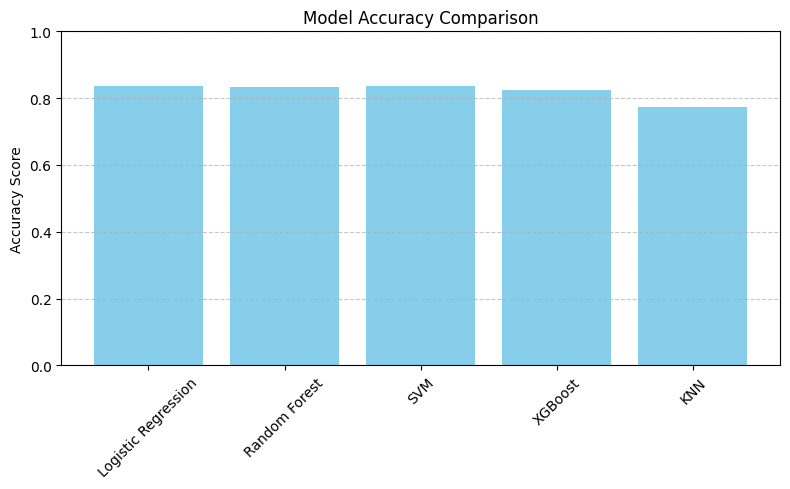

In [ ]:
import matplotlib.pyplot as plt

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar graph compares the accuracy of five classification models.Logistic Regreesion has the highest accuracy,followed closely by SVM and Random Forest .XGBoost performs moderately well,while KNN shows the lowest accuracy amoung all models.Overall,Logistic Regression appears to be the most accurate model in this comparision.

In [ ]:
import pandas as pd

# Create a list of dictionaries with evaluation results
results = [
    {
        'Model': 'Logistic Regression',
        'Accuracy': accuracy_score(y_test, y_pred_log),
        'ROC AUC': roc_auc_score(y_test, y_prob_log)
    },
    {
        'Model': 'Random Forest',
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'ROC AUC': roc_auc_score(y_test, y_prob_rf)
    },
    {
        'Model': 'SVM',
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'ROC AUC': roc_auc_score(y_test, y_prob_svm)
    },
    {
        'Model': 'KNN',
        'Accuracy': accuracy_score(y_test, y_pred_knn),
        'ROC AUC': roc_auc_score(y_test, y_prob_knn)
    },
    {
        'Model': 'XGBoost',
        'Accuracy': accuracy_score(y_test, y_pred_xgb),
        'ROC AUC': roc_auc_score(y_test, y_prob_xgb)
    }
]

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Round values for better readability
results_df = results_df.round(4)

# Show the table
print(results_df)


                 Model  Accuracy  ROC AUC
0  Logistic Regression    0.8366   0.9101
1        Random Forest    0.8325   0.9046
2                  SVM    0.8360   0.9089
3                  KNN    0.7725   0.8285
4              XGBoost    0.8239   0.8979


The comparision table shows performance metrices(Accuracy and ROC AUC)for five different classification models.SVM acheived the highest ROC AUC score of 0.9089,indicating it has the best ability to distinguish between classes .Logistic Regression and Random Forest both performed well , with accuracies of 0.8366 and 0.8325, and AUC scores above 0.90,showing strong perfromance.XGBoost also delivered good results with 0.8329 accuracy and 0.8979 AUC.KNN,however,had the lowest accuraccy (0.7725) and AUC (0.8285),making it the least effective amoung the models.Overall,SVM and Random Forest are the top-performing models in this evaluation.

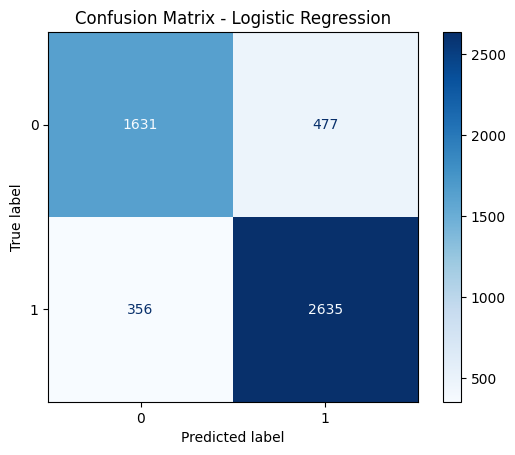

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# **ROC**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


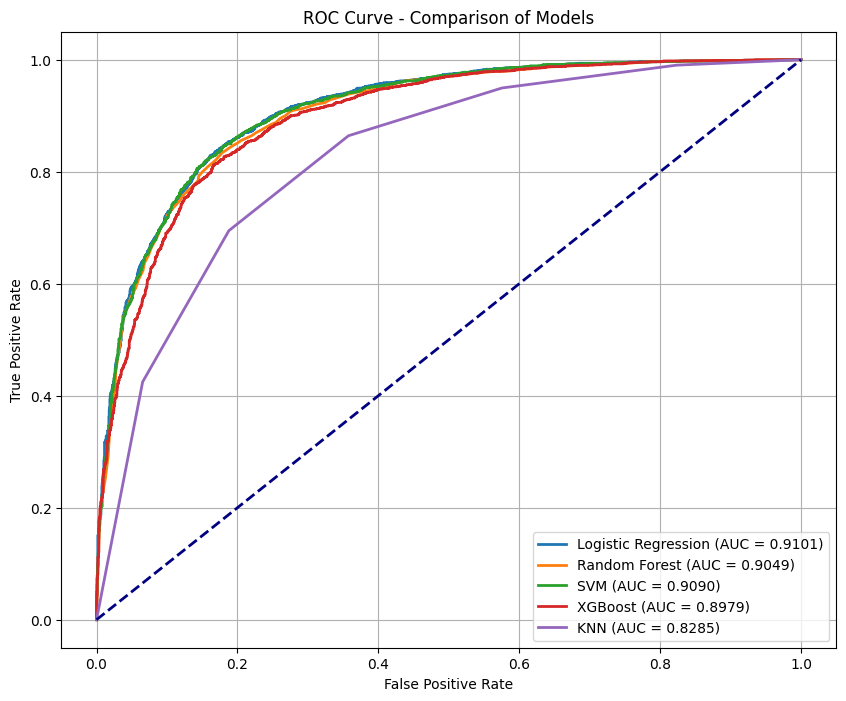

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Fit models
log_model = LogisticRegression().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)
svm_model = SVC(probability=True).fit(X_train, y_train)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)

# Get probabilities or decision scores
y_prob_log = log_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
y_prob_svm = svm_model.predict_proba(X_test)[:,1]
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]
y_prob_knn = knn_model.predict_proba(X_test)[:,1]

# Calculate ROC curves and AUCs
models = {
    "Logistic Regression": y_prob_log,
    "Random Forest": y_prob_rf,
    "SVM": y_prob_svm,
    "XGBoost": y_prob_xgb,
    "KNN": y_prob_knn
}

plt.figure(figsize=(10, 8))

for name, y_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparison of Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The ROC curve shows Logistic Regression performing best (AUC = 0.9101), closely followed by SVM and Random Forest. XGBoost also performs well, while KNN has the lowest AUC (0.8285), indicating weaker classification. Overall, Logistic Regression is the most effective model in distinguishing between classes